<a href="https://colab.research.google.com/github/juma-paul/deep_learning/blob/main/CalHousesRegressioinTensorFlow_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# You will train a two layer neural network using gradient descent. However, instead of manually computing the gradients, you will use the autodiff provided by Tensorflow package

A two layer neural network contains an input layer, a hidden layer, and an output layer. The number of the input nodes in the diagram below is
determined the dimension of our features. We are free to choose the dimension of the hidden layer. As for the nal output layer, the number of
nodes is determined by the type of the problem. For instance, for a regression problem, we will only have one node and the output value
corresponds to our prediction of the target. As for classication, we will rst output a vector that has same number of dimension as the number
of classes in our classication dataset. Then, we will apply the softmax transformation on the vector to transform real-valued predictions to the class probabilities

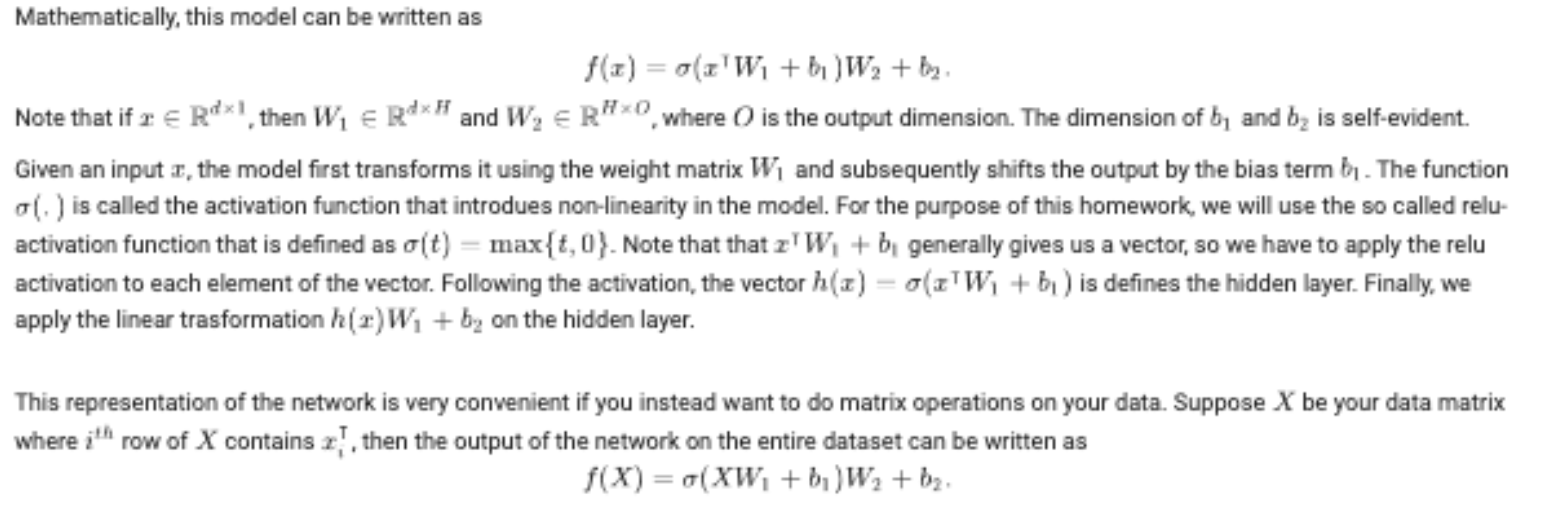

**Regression**

In homework 2, you trained a linear regression model on california housing dataset. In this homework, you will train a two-layer neural network
on this dataset using gradient descent.

In [1]:
# Import necessary packages
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
import numpy as np
from typing import Tuple

In [2]:
# Loading the dataset
from sklearn.datasets import fetch_california_housing
california_housing = fetch_california_housing( return_X_y=True, as_frame=True)

In [3]:
# Assign features to X and labels to y
X = california_housing[0]
y = california_housing[1]

In [4]:
# Features
X

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [5]:
X.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000


In [6]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
dtypes: float64(8)
memory usage: 1.3 MB


In [7]:
# Labels
y

,MedHouseVal
0,4.526
1,3.585
2,3.521
3,3.413
4,3.422
...,...
20635,0.781
20636,0.771
20637,0.923
20638,0.847


In [8]:
y.describe()

,MedHouseVal
count,20640.000000
mean,2.068558
std,1.153956
min,0.149990
25%,1.196000
50%,1.797000
75%,2.647250
max,5.000010


In [9]:
y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 20640 entries, 0 to 20639
Series name: MedHouseVal
Non-Null Count  Dtype  
--------------  -----  
20640 non-null  float64
dtypes: float64(1)
memory usage: 161.4 KB


In [10]:
# Split data into training and test sets
X_train_unscaled, X_test_unscaled, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [11]:
# Scale the dataset
scaler=StandardScaler()

X_train=scaler.fit_transform(X_train_unscaled)
X_test = scaler.transform(X_test_unscaled)

In [12]:
X_train.shape, X_test.shape

((14448, 8), (6192, 8))

In [13]:
# Convert the data into tensors
X_train = tf.convert_to_tensor(X_train, dtype = tf.float32)
X_test = tf.convert_to_tensor(X_test, dtype = tf.float32)
y_train = tf.convert_to_tensor(y_train, dtype = tf.float32)
y_test= tf.convert_to_tensor(y_test, dtype = tf.float32)

In [14]:
# Display first rows of the tensors (converted to numpy array for readability)
X_train.numpy()[:5]

array([[ 0.13350628,  0.50935745,  0.18106018, -0.2738497 , -0.18411678,
        -0.01082519, -0.8056819 ,  0.78093404],
       [-0.53221804, -0.6798731 , -0.42262954, -0.04786832, -0.37619075,
        -0.08931585, -1.3394727 ,  1.2452699 ],
       [ 0.1709897 , -0.36274496,  0.07312834, -0.24260044, -0.61124015,
        -0.04480037, -0.49664515, -0.27755183],
       [-0.402916  , -1.1555654 ,  0.17584811, -0.00855953, -0.98749465,
        -0.07522954,  1.690024  , -0.7069376 ],
       [-0.2992854 ,  1.8571521 , -0.25959808, -0.07099289,  0.08601465,
        -0.06635658,  0.99235016, -1.430902  ]], dtype=float32)

In [15]:
X_train.shape, X_test.shape

(TensorShape([14448, 8]), TensorShape([6192, 8]))

**Question 1: Fill in the input dimension and output dimension of the two layer neural network for regression on this dataset. (5 pts)**

For the purpose of this homework, we will just choose hidden layer with dimension double that of input dimension. However, going forward choosing the hidden
dimension appropriately would be an important part of deep learning.

In [16]:
# Set dimensions for the neural network
input_dim = X_train.shape[1] # nodes equal to number of features in the dataset
hidden_dim = 2 * input_dim # nodes twice number of features
output_dim = 1 # one output for regression task (MedHouseVal)

# Validate dimensions
assert input_dim > 0
assert hidden_dim > input_dim
assert output_dim == 1

print(f"Network Architecture:\n")
print(f"Input Layer: {input_dim} nodes")
print(f"Hidden Layer: {hidden_dim} nodes")
print(f"Output Layer: {output_dim} node")

Network Architecture:

Input Layer: 8 nodes
Hidden Layer: 16 nodes
Output Layer: 1 node


**Question 2: Define a tensorflow variables for weights W1, b1, W2, and b2. Then, initialize both biases b1 and b2 to be 0 vectors and initialize W1 and W2 by picking values uniformly at random from the interval [0,1].  (5 pts)**

In [17]:
# Initialize weights for hidden layer (Layer 1)
W1 = tf.Variable(
    tf.random.uniform(
        shape=[input_dim, hidden_dim],
        minval=0,
        maxval=1,
        dtype=tf.float32,
        name='W1'
    )
)

# Initialize bias for hidden layer
b1 = tf.Variable(
    tf.zeros(
        shape=[hidden_dim],
        dtype=tf.float32,
        name='b1'
    )
)

# Initialize weights for output layer (Layer 2)
W2 = tf.Variable(
    tf.random.uniform(
        shape=[hidden_dim, output_dim],
        minval=0,
        maxval=1,
        dtype=tf.float32,
        name='W2'
    )
)

# Initialize bias for output layer
b2 = tf.Variable(
    tf.zeros(
        shape=[output_dim],
        dtype=tf.float32,
        name='b2'
    )
)

# Print parameter shapes for verification
print(f"Network Parameter Shapes:\n")
print(f"W1: {W1.shape} - Hidden layer weights")
print(f"b1: {b1.shape} - Hidden layer bias")
print(f"W2: {W2.shape} - Output layer weights")
print(f"b2: {b2.shape} - Output layer bias")

Network Parameter Shapes:

W1: (8, 16) - Hidden layer weights
b1: (16,) - Hidden layer bias
W2: (16, 1) - Output layer weights
b2: (1,) - Output layer bias


**Question 3: Complete the model function below to define a two layer neural network. Here, inputs is a matrix of shape n x d, where row of the inputs matrix contains xiT. (10 pts)**
Hint: Use tf.nn.relu() function for relu activation.

In [18]:
def model(inputs: tf.Tensor) -> tf.Tensor:
  hidden = tf.nn.relu(
      tf.matmul(inputs, W1) + b1) # Hidden layer with ReLU activation

  output = tf.matmul(hidden, W2) + b2 # Output layer (linear activation for regression)

  return output

**Question 4:** Write a function below that computes mean-squared error given the predictions and targets. You should use tensorflow
operations like tf.square and tf.reduce_mean for autodiff to work. Note that you cannot use inbuilt tensorow MSE function. (10 pts)

In [19]:
def mse(predictions: tf.Tensor, targets: tf.Tensor) -> tf.Tensor:
    squared_error = tf.square(predictions - targets) # Element-wise squared difference
    mean_squared_error = tf.reduce_mean(squared_error) # Average of squared errors

    return mean_squared_error


**Question 5: Complete the function below that takes in features and targets and trains your two layer neural network using gradient descent. Please use autodiff by Gradient taping. (10 pts)**

In [20]:
# Set hyperparameters
def train(inputs: tf.Tensor, targets: tf.Tensor, optimizer: tf.keras.optimizers.Optimizer) -> tf.Tensor:
    with tf.GradientTape() as tape:
        # Forward pass: compute predictions and loss
        predictions = model(inputs)
        loss = mse(predictions, targets)

    # Backward pass: compute gradients
    gradients = tape.gradient(loss, [W1, b1, W2, b2])

    # Update weights
    optimizer.apply_gradients(zip(gradients, [W1, b1, W2, b2]))

    return loss


**Question 6: Complete the routine below that divides the randomly shuffled data into multiple minibatches of size 1000 and use the train function above to run gradient descent on those minibatches. Within each step, you should make a complete pass through the dataset. (10pts)**

In [23]:
# Stochastic-minibatch gradient descent

BATCH_SIZE = 128
num_samples = X_train.shape[0]
num_batches = num_samples // BATCH_SIZE
num_epochs = 75

# Define the optimizer
learning_rate = 0.003
optimizer = tf.keras.optimizers.Adam(learning_rate)

for epoch in range(num_epochs):
    # Shuffle the dataset at each epoch
    X_train_shuffled = tf.random.shuffle(X_train, seed=epoch)
    y_train_shuffled = tf.random.shuffle(y_train, seed=epoch)

    # Iterate over each minibatch
    for batch in range(num_batches):
        start_idx = batch * BATCH_SIZE
        end_idx = start_idx + BATCH_SIZE
        X_batch = X_train_shuffled[start_idx:end_idx]
        y_batch = y_train_shuffled[start_idx:end_idx]

        # Train on the current minibatch
        train(X_batch, y_batch, optimizer)

    predictions = model(X_train)
    # Calculate loss on the entire dataset after each epoch
    loss = mse(predictions, y_train)
    if (epoch + 1) % 10 == 0:
        print(f"Loss at epoch {epoch + 1}: {loss:.4f}")

Loss at epoch 10: 1.3411
Loss at epoch 20: 1.3414
Loss at epoch 30: 1.3400
Loss at epoch 40: 1.3399
Loss at epoch 50: 1.3401
Loss at epoch 60: 1.3400
Loss at epoch 70: 1.3402


**Question 7: Get predictions on your test data set and report the MSE loss on the test data. (5 pts)**

In [24]:
# Generate predictions for the test dataset
predictions = model(X_test)

# Calculate the Mean Squared Error (MSE) loss on the test dataset
test_mse_loss = mse(predictions, y_test)

# Display the test loss with a descriptive output
print(f"Mean Squared Error on test data: {test_mse_loss:.4f}")

Mean Squared Error on test data: 1.3126
